## ECSE415 Part 2

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sklearn
import pandas as pd
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from numpy import genfromtxt
import csv
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[151, 123, 102],
        [151, 123, 102],
        [151, 123, 102],
        ...,
        [204, 162, 120],
        [207, 166, 122],
        [207, 166, 122]],

       [[150, 122, 101],
        [150, 122, 101],
        [150, 122, 101],
        ...,
        [194, 152, 110],
        [198, 157, 113],
        [201, 160, 114]],

       [[153, 125, 104],
        [153, 125, 104],
        [152, 124, 103],
        ...,
        [180, 139,  95],
        [181, 140,  96],
        [181, 140,  94]]

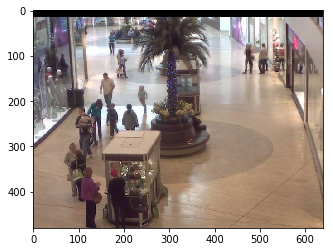

In [6]:
def read_image(number, display=False):
    path = './drive/MyDrive/frames/seq_{}.jpg'.format(str(number).zfill(6))
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if display:
        plt.imshow(img)
    return img
        
read_image(22, display=True)

In [7]:
frames = []
for i in range(1, 2001):
    frames.append(read_image(i))

In [8]:
print(len(frames))

2000


In [10]:
people_boxes = genfromtxt('./people_rectangles.csv', dtype=int, delimiter=',', skip_header=1)

In [11]:
list_boxes = []
for b in people_boxes:
    idx, x, y, w, h = b
    img = frames[idx-1]
    cropped_img = img[y:y+h,x:x+w]
    list_boxes.append(cropped_img)

In [20]:
def create_negatives():
  negatives=[]
  for n in range(0, 2000):
    for y in range(0, frames[n].shape[0]-20,50):
      for x in range(0, frames[n].shape[1]-20,50):
        for box in people_boxes:
          if(box[0] < n):
            continue
          if((box[0] == n) and (x >= box[1] - 49) and (x <= box[1] + box[3]) and (y >= box[2] - 49) and (y <= box[2] + box[4])):
            break
          elif (box[0] == n+1):
            negatives.append([n+1,x,y,50,50])
            break;
    if(n > 0 and n % 100 == 0):
      print(str(n) + 'th frame')
  
  with open('negative_rectangles.csv', 'w') as fp:
    writer = csv.writer(fp)
    writer.writerow(['image_id', 'x', 'y', 'w', 'h'])
    writer.writerows(negatives)

In [21]:
create_negatives()
files.download('./negative_rectangles.csv')

100th frame
200th frame
300th frame
400th frame
500th frame
600th frame
700th frame
800th frame
900th frame
1000th frame
1100th frame
1200th frame
1300th frame
1400th frame
1500th frame
1600th frame
1700th frame
1800th frame
1900th frame


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
non_people_boxes = genfromtxt('./negative_rectangles.csv', dtype=int, delimiter=',', skip_header=1)

In [23]:
negative_boxes = []
for b in non_people_boxes:
    idx, x, y, w, h = b
    img = frames[idx-1]
    cropped_img = img[y:y+h,x:x+w]
    negative_boxes.append(cropped_img)

In [24]:
print(negative_boxes[:20])

[array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[103,  99,  96],
        [ 87,  86,  82],
        [ 98,  94,  91],
        ...,
        [121, 114, 130],
        [140, 137, 158],
        [186, 181, 204]],

       [[ 88,  86,  89],
        [ 85,  85,  85],
        [ 97,  95,  96],
        ...,
        [134, 131, 148],
        [145, 147, 168],
        [174, 174, 200]],

       [[ 89,  88,  93],
        [ 85,  85,  87],
        [ 93,  93,  95],
        ...,
        [130, 129, 145],
        [128, 133, 155],
        [154, 155, 183]